<a href="https://colab.research.google.com/github/DamienNaz/DamienNaz/blob/main/Exerc%C3%ADcio5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Definição (Gradiente Descendente/Ascendente)**
Seja $f(x)$ a função objetivo que você está procuranto maximizar (ou minimizar).
* Encontre a primeira derivada da sua função objetivo, $f'(x)$.
* Escolha um ponto inicial, $x_0$.
* Escolha um parâmetro de controle pequeno, $\alpha$ (em Machine Learning chamamos este parâmetro de "learning rate" para o algoritmo do gradiente descendente).
* Use a iteração $x_{n+1} = x_n + \alpha f'(x_n)$ se estiver maximizando. Use a iteração $x_{n+1} = x_n - \alpha f'(x_n)$ se estiver minimizando
* Itere (decida por uma boa condição de paragem)

**Exercício 1**: Implemente o algoritmo do Gradiente Descendente. Use o código para comparar com a solução do problema da caixa com volume máximo.

**Definição (Monte-Carlo)**
Seja $f(x)$ a função objetivo que você está tentando maximizar (ou minimizar)
* Escolha muitos (talvez milhares) de valores diferentes para $x$.
* Encontre o valor da função objetivo em cada um desses valores (use listas, não loops)
* Guarde o $x$ com maior $f(x)$ (ou menor, se estiver minimizando).
* Itere várias vezes e compare os valores entre as iterações.

**Exercício 2**: Implemente o algoritmo de Monte-Carlo. Use o código para comparar com a solução do problema da caixa com volume máximo.

**Definição: Otimização através da raíz**
Seja $f(x)$ a função objetivo que está sendo maximizada (ou minimizada)
* Encontre a derivada da função objetivo
* Iguale a derivada a zero e use algum método numérico para encontrar o ponto crítico (como Newton).
* Use o teorema do valor extremo para determinar se o ponto crítico ou um dos extremos do intervalo é o ponto máximo (ou mínimo)

**Exercício 3**: Implemente o algoritmo da otimização através da raíz. Use o código para comparar com a solução do problema da caixa com volume máximo.

**Exercício 4**
Escreva um algoritmo para generalizar o método do gradiente descendente/ascendente para funções com mais de uma variável.

**Exercício 5**
Escreva um algoritmo para generalizar o método dde Monte-Carlo para funções com mais de uma variável.

**Definição Algoritmo do Gradiente Descendente**

Queremos resolver o problema
$$\text{minimize } f(x_1, x_2, \ldots, x_n) \text{ subject to }(x_1, x_2, \ldots, x_n) \in S.$$

a. Escolha um ponto inicial aleatório $\boldsymbol{x}_0 = (x_1,x_2,\ldots,x_n)\in S$
b. Vamos definir uma equação diferencial que fornece diferentes alternativas para o valor ótimo:

$$\boldsymbol{x}_{n+1} = \boldsymbol{x}_n - \alpha \nabla f(\boldsymbol{x}_n).$$

c. Repita o processo iterativo até que os pontos das iterações estejam próximos o suficiente um do outro.

**Exercício 6**
A função $f(x,y) = sen(x)cos(y)$ tem muitos extremos locais, o que torna a otimização um desafio. Implemente o código do gradiente descendente e aplique-o nesta função para encontrar o mínimo local $(-\pi/2, 0)$. Comece em algum ponto próximo de $(-\pi/2, 0)$ e mostre que o seu código pode não convergir para este mínimo local.

Exercicio 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Constante: lado do papel
L = 10

# Função Volume
def V(x):
    return x * (L - 2*x)**2

# Derivada de V(x)
def V_prime(x):
    return (L - 2*x)**2 - 4*x*(L - 2*x)

# Gradiente Ascendente (maximização)
def gradient_ascent(x0, alpha, max_iter=1000, tol=1e-6):
    x = x0
    history = [x]
    for _ in range(max_iter):
        grad = V_prime(x)
        x_new = x + alpha * grad
        if abs(x_new - x) < tol:
            break
        x = x_new
        history.append(x)
    return x, V(x), history


In [2]:
def monte_carlo_max(L, n=10000):
    x_vals = np.random.uniform(0, L/2, size=n)  # x ∈ (0, L/2)
    v_vals = V(x_vals)
    idx_max = np.argmax(v_vals)
    return x_vals[idx_max], v_vals[idx_max]


In [5]:

x0 = 1.0
alpha = 0.01


x_opt_gd, v_opt_gd, hist = gradient_ascent(x0, alpha)

# Monte Carlo
x_opt_mc, v_opt_mc = monte_carlo_max(L)

# Resultados
print(f"Gradiente Ascendente: x = {x_opt_gd:.4f}, V = {v_opt_gd:.4f}")
print(f"Monte Carlo:          x = {x_opt_mc:.4f}, V = {v_opt_mc:.4f}")


Gradiente Ascendente: x = 1.6667, V = 74.0741
Monte Carlo:          x = 1.6669, V = 74.0741


Exercicio 2

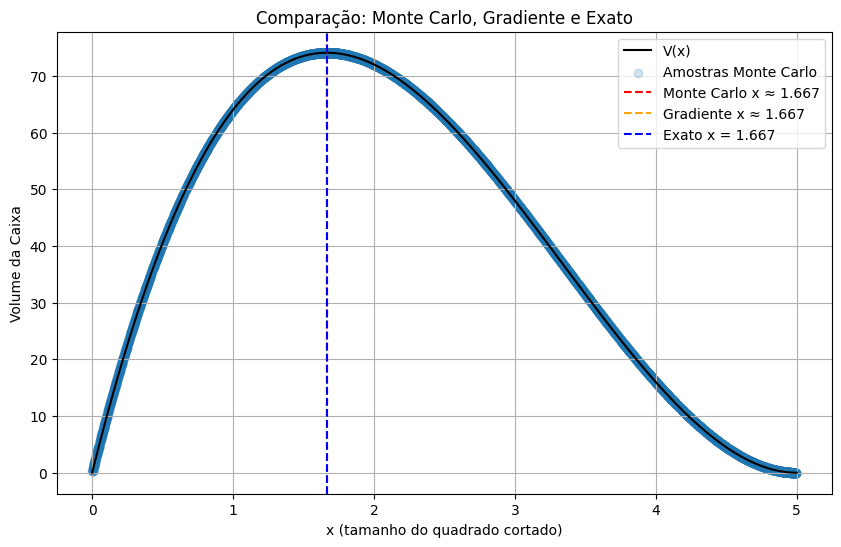

Solução Exata:        x = 1.6667, V = 74.0741
Monte Carlo:          x = 1.6668, V = 74.0741
Gradiente Ascendente: x = 1.6667, V = 74.0741


In [10]:

L = 10

# Função volume da caixa
def V(x):
    return x * (L - 2 * x) ** 2

# Derivada da função volume
def V_prime(x):
    return (L - 2 * x) ** 2 - 4 * x * (L - 2 * x)

# Método de Monte Carlo
def monte_carlo_max(L, n=10000):
    x_vals = np.random.uniform(0, L / 2, size=n)  # x ∈ (0, L/2)
    v_vals = V(x_vals)
    idx_max = np.argmax(v_vals)
    return x_vals[idx_max], v_vals[idx_max], x_vals, v_vals

# Gradiente Ascendente
def gradient_ascent(x0, alpha=0.01, max_iter=1000, tol=1e-6):
    x = x0
    history = [x]
    for _ in range(max_iter):
        grad = V_prime(x)
        x_new = x + alpha * grad
        if abs(x_new - x) < tol:
            break
        x = x_new
        history.append(x)
    return x, V(x), history

# Solução exata
x_exact = L / 6
v_exact = V(x_exact)

# Executando Monte Carlo
x_opt_mc, v_opt_mc, x_samples, v_samples = monte_carlo_max(L)

# Executando Gradiente Ascendente
x0 = 1.0
alpha = 0.01
x_opt_grad, v_opt_grad, grad_history = gradient_ascent(x0, alpha)

# Gráfico comparativo
x_plot = np.linspace(0, L / 2, 300)
plt.figure(figsize=(10, 6))
plt.plot(x_plot, V(x_plot), label="V(x)", color="black")
plt.scatter(x_samples, v_samples, alpha=0.2, label="Amostras Monte Carlo")
plt.axvline(x=x_opt_mc, color='red', linestyle='--', label=f"Monte Carlo x ≈ {x_opt_mc:.3f}")
plt.axvline(x=x_opt_grad, color='orange', linestyle='--', label=f"Gradiente x ≈ {x_opt_grad:.3f}")
plt.axvline(x=x_exact, color='blue', linestyle='--', label=f"Exato x = {x_exact:.3f}")
plt.title("Comparação: Monte Carlo, Gradiente e Exato")
plt.xlabel("x (tamanho do quadrado cortado)")
plt.ylabel("Volume da Caixa")
plt.legend()
plt.grid(True)
plt.show()

# Impressão dos resultados
print(f"Solução Exata:        x = {x_exact:.4f}, V = {v_exact:.4f}")
print(f"Monte Carlo:          x = {x_opt_mc:.4f}, V = {v_opt_mc:.4f}")
print(f"Gradiente Ascendente: x = {x_opt_grad:.4f}, V = {v_opt_grad:.4f}")


Exercicio 3

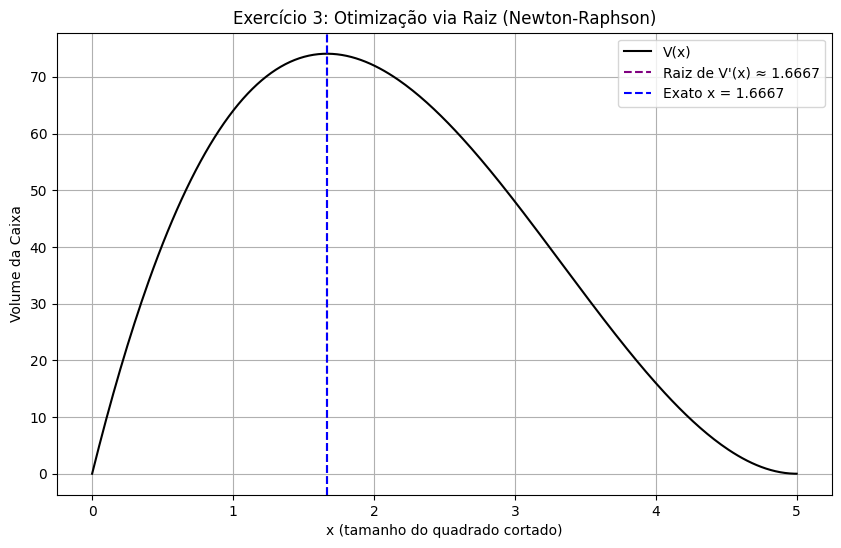

[Newton-Raphson] x ≈ 1.666666, V(x) ≈ 74.074074
[Solução Exata]  x = 1.666667, V(x) = 74.074074
[Máximo Global]  x = 1.666666, V(x) = 74.074074


In [12]:
# Importando bibliotecas
import numpy as np
import matplotlib.pyplot as plt

# Constante: lado da folha
L = 10

# Função volume da caixa
def V(x):
    return x * (L - 2 * x) ** 2

# Derivada primeira
def V_prime(x):
    return (L - 2 * x)**2 - 4 * x * (L - 2 * x)

# Derivada segunda (para Newton-Raphson)
def V_double_prime(x):
    return -12 * (L - 2 * x) + 8 * x

# Método de Newton-Raphson
def newton_root(f_prime, f_double_prime, x0, tol=1e-6, max_iter=1000):
    x = x0
    for _ in range(max_iter):
        fpx = f_prime(x)
        fppx = f_double_prime(x)
        if abs(fppx) < 1e-8:
            break  # evitar divisão por zero
        x_new = x - fpx / fppx
        if abs(x_new - x) < tol:
            return x_new
        x = x_new
    return x

# Chute inicial
x0 = 1.0

# Aplicar método de Newton
x_root = newton_root(V_prime, V_double_prime, x0)
v_root = V(x_root)

# Verificar extremos do intervalo
x_min = 0
x_max = L / 2
v_min = V(x_min)
v_max = V(x_max)

# Comparar com extremos (Teorema do Valor Extremo)
x_all = [x_min, x_root, x_max]
v_all = [v_min, v_root, v_max]
idx_max = np.argmax(v_all)
x_opt = x_all[idx_max]
v_opt = v_all[idx_max]

# Solução exata (analítica)
x_exact = L / 6
v_exact = V(x_exact)

# Visualização
x_plot = np.linspace(0, L / 2, 300)
plt.figure(figsize=(10, 6))
plt.plot(x_plot, V(x_plot), label="V(x)", color="black")
plt.axvline(x=x_root, color='purple', linestyle='--', label=f"Raiz de V'(x) ≈ {x_root:.4f}")
plt.axvline(x=x_exact, color='blue', linestyle='--', label=f"Exato x = {x_exact:.4f}")
plt.title("Exercício 3: Otimização via Raiz (Newton-Raphson)")
plt.xlabel("x (tamanho do quadrado cortado)")
plt.ylabel("Volume da Caixa")
plt.legend()
plt.grid(True)
plt.show()

# Exibir resultados
print(f"[Newton-Raphson] x ≈ {x_root:.6f}, V(x) ≈ {v_root:.6f}")
print(f"[Solução Exata]  x = {x_exact:.6f}, V(x) = {v_exact:.6f}")
print(f"[Máximo Global]  x = {x_opt:.6f}, V(x) = {v_opt:.6f}")


Exercicio 4

In [13]:
def gradient_descent_multivariate(f, grad_f, x0, alpha=0.01, max_iter=1000, tol=1e-6, maximize=False):

    x = x0
    history = [x0.copy()]

    for _ in range(max_iter):
        grad = grad_f(x)
        if maximize:
            x_new = x + alpha * grad
        else:
            x_new = x - alpha * grad

        history.append(x_new.copy())

        if np.linalg.norm(x_new - x) < tol:
            break
        x = x_new

    return x, f(x), history


In [14]:
# Função objetivo
def f_example(x):
    return (x[0] - 2)**2 + (x[1] + 3)**2

# Gradiente da função
def grad_f_example(x):
    return np.array([2 * (x[0] - 2), 2 * (x[1] + 3)])

# Ponto inicial
x0 = np.array([0.0, 0.0])

# Executar o algoritmo
sol, fval, hist = gradient_descent_multivariate(f_example, grad_f_example, x0, alpha=0.1)

print("Solução encontrada:", sol)
print("Valor mínimo de f:", fval)


Solução encontrada: [ 1.99999755 -2.99999632]
Valor mínimo de f: 1.953987429160643e-11


Exercicio 5

In [15]:
def monte_carlo_multivariate(f, bounds, n_samples=10000, maximize=False):

    dim = len(bounds)
    samples = np.array([
        [np.random.uniform(low, high) for (low, high) in bounds]
        for _ in range(n_samples)
    ])

    values = np.array([f(x) for x in samples])
    idx_opt = np.argmax(values) if maximize else np.argmin(values)
    return samples[idx_opt], values[idx_opt], samples, values


In [16]:

def f_example(x):
    return (x[0] - 2)**2 + (x[1] + 3)**2


bounds = [(-10, 10), (-10, 10)]

# Executar Monte Carlo
x_opt_mc, f_opt_mc, samples, values = monte_carlo_multivariate(f_example, bounds)

print("Solução Monte Carlo:", x_opt_mc)
print("Valor mínimo aproximado:", f_opt_mc)


Solução Monte Carlo: [ 2.14231675 -2.97252218]
Valor mínimo aproximado: 0.021009087168466965


Exercicio 6

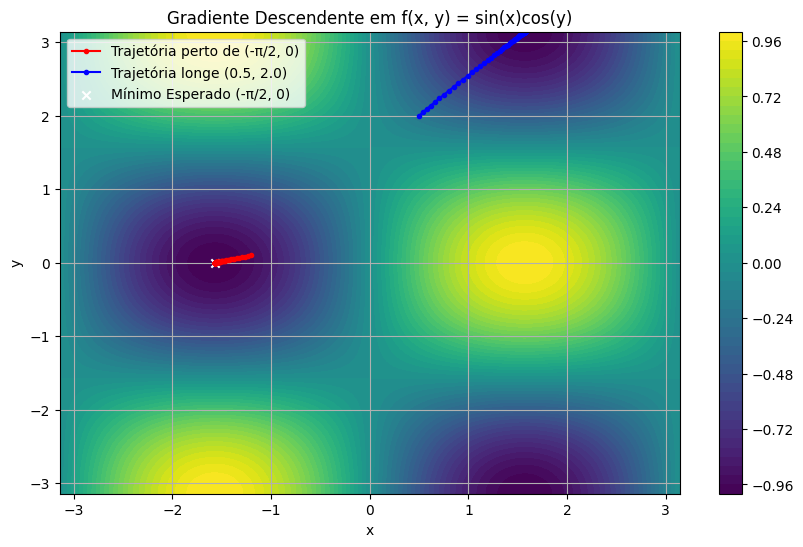

Trajetória 1 (próximo): x = [-1.57078732e+00  2.49163042e-06], f(x) = -0.9999999999562905
Trajetória 2 (distante): x = [1.57078941 3.14158551], f(x) = -0.9999999999505325


In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Função objetivo e gradiente
def f(xy):
    x, y = xy
    return np.sin(x) * np.cos(y)

def grad_f(xy):
    x, y = xy
    dfdx = np.cos(x) * np.cos(y)
    dfdy = -np.sin(x) * np.sin(y)
    return np.array([dfdx, dfdy])

# Gradiente descendente
def gradient_descent(f, grad_f, x0, alpha=0.1, max_iter=1000, tol=1e-6):
    x = np.array(x0, dtype=float)
    history = [x.copy()]

    for _ in range(max_iter):
        grad = grad_f(x)
        x_new = x - alpha * grad
        if np.linalg.norm(x_new - x) < tol:
            break
        x = x_new
        history.append(x.copy())

    return x, f(x), history

# Domínio para visualização
x_vals = np.linspace(-np.pi, np.pi, 400)
y_vals = np.linspace(-np.pi, np.pi, 400)
X, Y = np.meshgrid(x_vals, y_vals)
Z = np.sin(X) * np.cos(Y)

# Execução 1: próximo de (-π/2, 0)
x0_close = [-1.2, 0.1]
x_min_close, f_min_close, hist_close = gradient_descent(f, grad_f, x0_close)

# Execução 2: longe (0.5, 2.0)
x0_far = [0.5, 2.0]
x_min_far, f_min_far, hist_far = gradient_descent(f, grad_f, x0_far)

# Converter históricos para array
hist_close = np.array(hist_close)
hist_far = np.array(hist_far)

# Visualização
plt.figure(figsize=(10, 6))
cp = plt.contourf(X, Y, Z, levels=50, cmap='viridis')
plt.plot(hist_close[:, 0], hist_close[:, 1], 'r.-', label='Trajetória perto de (-π/2, 0)')
plt.plot(hist_far[:, 0], hist_far[:, 1], 'b.-', label='Trajetória longe (0.5, 2.0)')
plt.scatter([-np.pi/2], [0], color='white', marker='x', label='Mínimo Esperado (-π/2, 0)')
plt.colorbar(cp)
plt.title("Gradiente Descendente em f(x, y) = sin(x)cos(y)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

# Resultados
print(f"Trajetória 1 (próximo): x = {x_min_close}, f(x) = {f_min_close}")
print(f"Trajetória 2 (distante): x = {x_min_far}, f(x) = {f_min_far}")
